In [1]:
#1
import cv2 as cv
import sys
file_name = 'soccer2.jpg'
img=cv.imread(file_name) 
if img is None:
    sys.exit('파일({0})을 찾을 수 없습니다.'.format(file_name))
cv.imshow('original_RGB',img)
cv.imshow('Upper left half',img[0:img.shape[0]//2,0:img.shape[1]//2,:])
cv.imshow('Center half',img[img.shape[0]//4:3*img.shape[0]//4,img.shape[1]//4:3*img.shape[1]//4,:])

cv.imshow('R channel',img[:,:,2])
cv.imshow('G channel',img[:,:,1])
cv.imshow('B channel',img[:,:,0])

cv.waitKey()
cv.destroyAllWindows()

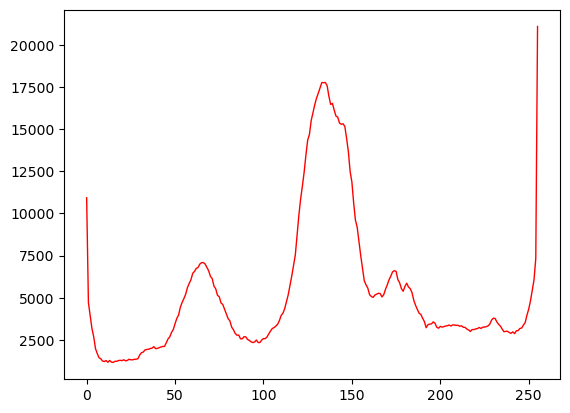

In [2]:
#2
import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread('soccer2.jpg') 
h=cv.calcHist([img],[2],None,[256],[0,256]) # 2번 채널인 R 채널에서 히스토그램 구함
plt.plot(h,color='r',linewidth=1)

In [3]:
#3
import cv2 as cv
import sys

In [4]:
img=cv.imread('./soccer2.jpg') 
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [5]:
t,bin_img=cv.threshold(img[:,:,2],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print('오츄 알고리즘이 찾은 최적 임곗값=',t)

오츄 알고리즘이 찾은 최적 임곗값= 113.0


In [6]:
t,bin_img_gray=cv.threshold(gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print('오츄 알고리즘이 찾은 최적 임곗값=',t)

오츄 알고리즘이 찾은 최적 임곗값= 119.0


In [7]:
cv.imshow('Color', img)
cv.imshow('Color Gray',gray)
cv.imshow('Color Gray binarization',bin_img_gray)
cv.imshow('R channel',img[:,:,2])			# R 채널 영상
cv.imshow('R channel binarization',bin_img)	# R 채널 이진화 영상
cv.waitKey()
cv.destroyAllWindows()

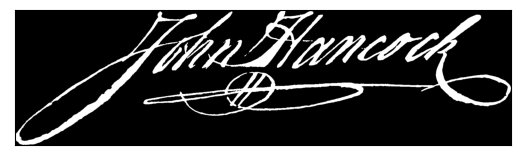

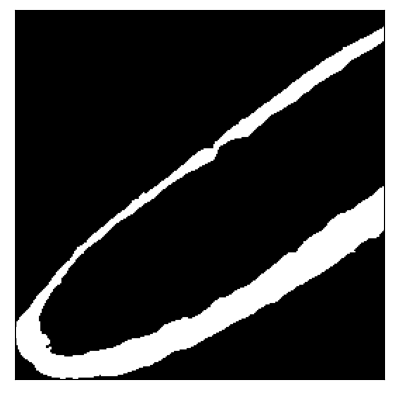

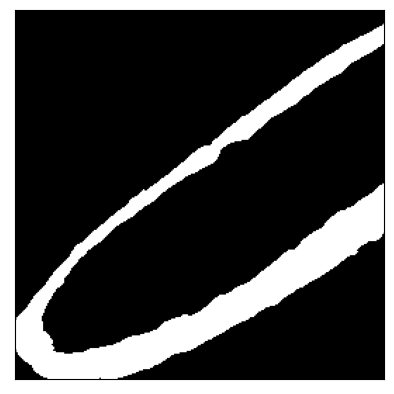

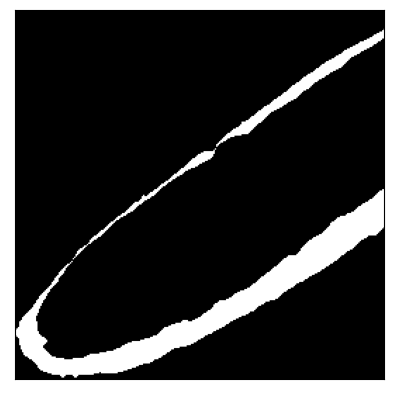

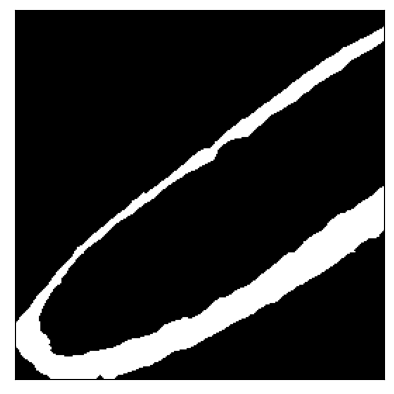

In [8]:
#4
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img=cv.imread('JohnHancocksSignature.png',cv.IMREAD_UNCHANGED) 

t,bin_img=cv.threshold(img[:,:,3],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(bin_img,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show() 

b=bin_img[bin_img.shape[0]//2:bin_img.shape[0],0:bin_img.shape[0]//2+1]
plt.imshow(b,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

se=np.uint8([[0,0,1,0,0],			# 구조 요소
            [0,1,1,1,0],
            [1,1,1,1,1],
            [0,1,1,1,0],
            [0,0,1,0,0]])

b_dilation=cv.dilate(b,se,iterations=1)	# 팽창
plt.imshow(b_dilation,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

b_erosion=cv.erode(b,se,iterations=1)	# 침식
plt.imshow(b_erosion,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

b_closing=cv.erode(cv.dilate(b,se,iterations=1),se,iterations=1)	# 닫기
plt.imshow(b_closing,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
#5
import cv2 as cv
import numpy as np

img=cv.imread('soccer2.jpg') 
img=cv.resize(img,dsize=(0,0),fx=0.25,fy=0.25)

def gamma(f,gamma=1.0):
    f1=f/255.0			# L=256이라고 가정
    return np.uint8(255*(f1**gamma))

gc=np.hstack((gamma(img,0.5),gamma(img,0.75),gamma(img,1.0),gamma(img,2.0),gamma(img,3.0)))
cv.imshow('gamma',gc)

cv.waitKey()
cv.destroyAllWindows()

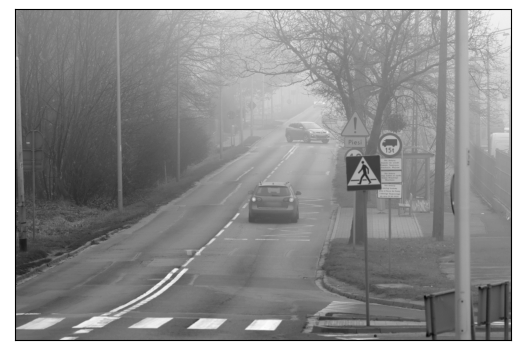

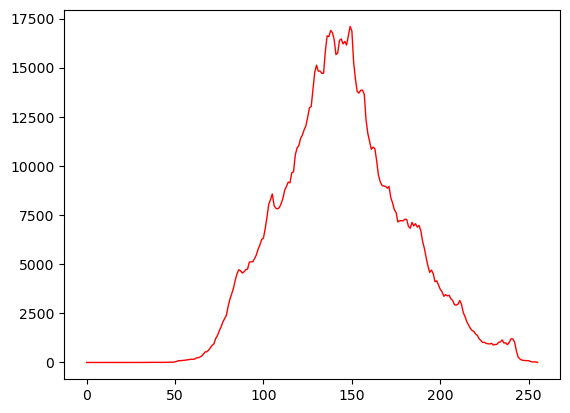

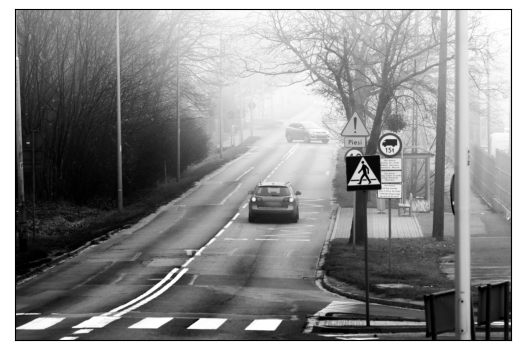

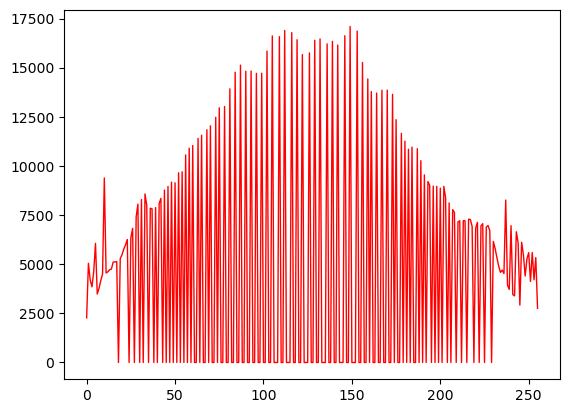

([<matplotlib.lines.Line2D at 0x24e13af4d60>], None)

In [10]:
#6
import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread('mistyroad.jpg') 

gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)		# 명암 영상으로 변환하고 출력
plt.imshow(gray,cmap='gray'), plt.xticks([]), plt.yticks([]), plt.show()

h=cv.calcHist([gray],[0],None,[256],[0,256])	# 히스토그램을 구해 출력
plt.plot(h,color='r',linewidth=1), plt.show()

equal=cv.equalizeHist(gray)			# 히스토그램을 평활화하고 출력
plt.imshow(equal,cmap='gray'), plt.xticks([]), plt.yticks([]), plt.show()

h=cv.calcHist([equal],[0],None,[256],[0,256])	# 히스토그램을 구해 출력
plt.plot(h,color='r',linewidth=1), plt.show()

In [13]:
#7
import cv2 as cv
import numpy as np

img=cv.imread('soccer2.jpg')
img=cv.resize(img,dsize=(0,0),fx=0.4,fy=0.4)
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.putText(gray,'soccer',(10,20),cv.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
cv.imshow('Original',gray)

smooth=np.hstack((cv.GaussianBlur(gray,(5,5),0.0),cv.GaussianBlur(gray,(9,9),0.0),cv.GaussianBlur(gray,(15,15),0.0)))
cv.imshow('Smooth',smooth)

femboss=np.array([[-1.0, 0.0, 0.0],
                  [ 0.0, 0.0, 0.0],
                  [ 0.0, 0.0, 1.0]])

gray16=np.int16(gray)
emboss=np.uint8(np.clip(cv.filter2D(gray16,-1,femboss)+128,0,255))
emboss_bad=np.uint8(cv.filter2D(gray16,-1,femboss)+128)
emboss_worse=cv.filter2D(gray,-1,femboss)

cv.imshow('Emboss',emboss)
cv.imshow('Emboss_bad',emboss_bad)
cv.imshow('Emboss_worse',emboss_worse)

cv.waitKey()
cv.destroyAllWindows()

In [12]:
#8
import cv2 as cv

img=cv.imread('rose.png')
patch=img[250:350,170:270,:]

img=cv.rectangle(img,(170,250),(270,350),(255,0,0),3)
patch1=cv.resize(patch,dsize=(0,0),fx=5,fy=5,interpolation=cv.INTER_NEAREST)
patch2=cv.resize(patch,dsize=(0,0),fx=5,fy=5,interpolation=cv.INTER_LINEAR)
patch3=cv.resize(patch,dsize=(0,0),fx=5,fy=5,interpolation=cv.INTER_CUBIC)

cv.imshow('Original',img)
cv.imshow('Resize nearest',patch1) 
cv.imshow('Resize bilinear',patch2) 
cv.imshow('Resize bicubic',patch3) 

cv.waitKey()
cv.destroyAllWindows()

In [ ]:
#9
import cv2 as cv
import numpy as np
import time

def my_cvtGray1(bgr_img):
    g=np.zeros([bgr_img.shape[0],bgr_img.shape[1]])
    for r in range(bgr_img.shape[0]):
        for c in range(bgr_img.shape[1]):
            g[r,c]=0.114*bgr_img[r,c,0]+0.587*bgr_img[r,c,1]+0.299*bgr_img[r,c,2]
    return np.uint8(g)

def my_cvtGray2(bgr_img):
    g=np.zeros([bgr_img.shape[0],bgr_img.shape[1]])
    g=0.114*bgr_img[:,:,0]+0.587*bgr_img[:,:,1]+0.299*bgr_img[:,:,2]
    return np.uint8(g)
    
img=cv.imread('girl_laughing.png') 

start=time.time()
my_cvtGray1(img)
print('My time1:',time.time()-start)

start=time.time()
my_cvtGray2(img)
print('My time2:',time.time()-start)

start=time.time()
cv.cvtColor(img,cv.COLOR_BGR2GRAY)
print('OpenCV time:',time.time()-start)

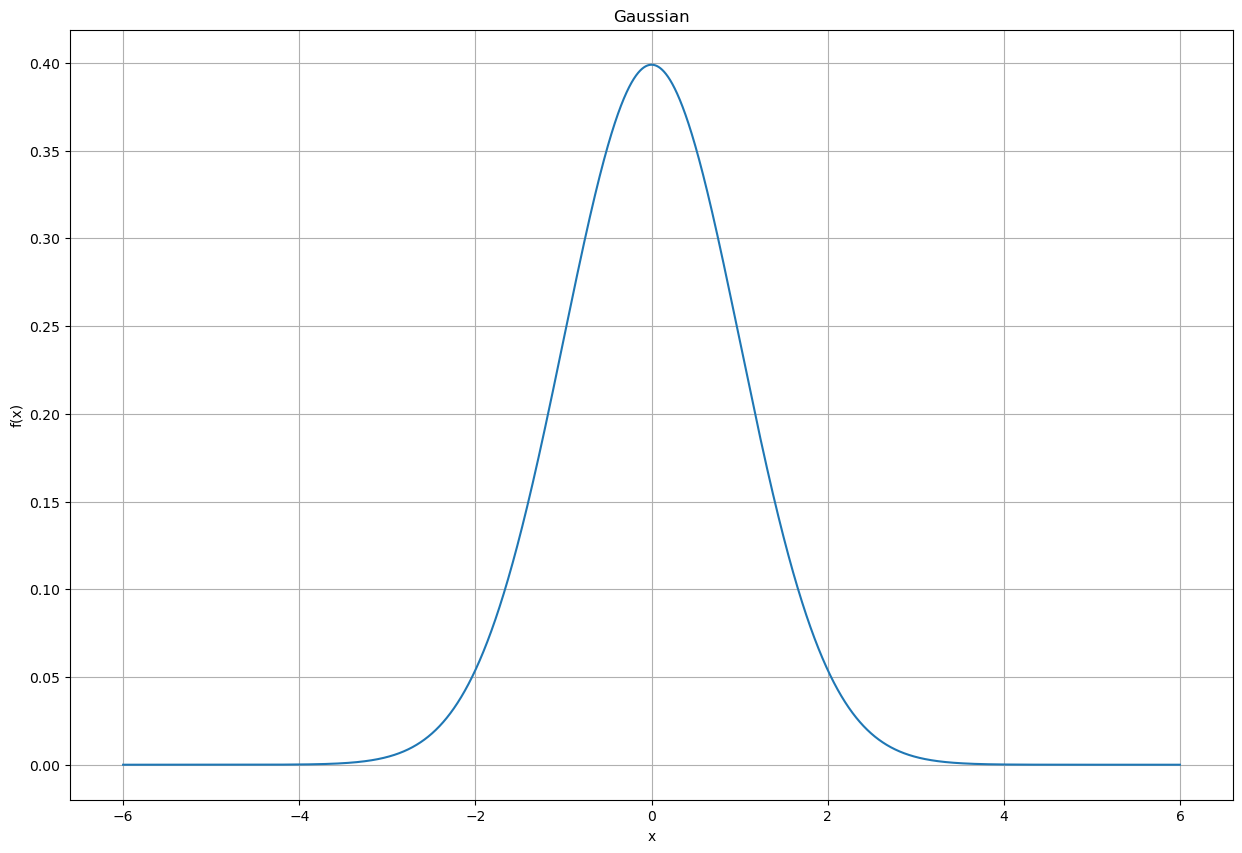

In [6]:
#연습문제 6
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.stats import norm 

x = np.arange(-6, 6, 0.001) 
plt.figure(figsize=(15,10)) 
plt.title('Gaussian') 
plt.xlabel('x') 
plt.ylabel('f(x)') 
plt.grid() 
plt.plot(x, norm.pdf(x, loc=0, scale=1)) 
plt.show() 

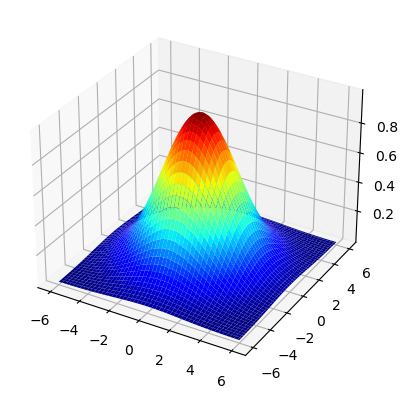

In [17]:
from matplotlib import cm

x=np.linspace(-6,6, num=100)
y=np.linspace(-6,6, num=100)

x, y = np.meshgrid(x, y)

z = np.exp(-0.1*x**2-0.1*y**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z, cmap=cm.jet)
plt.show()

In [3]:
#연습문제7
import cv2 as cv
import numpy as np

img=cv.imread('soccer2.jpg')
img=cv.resize(img,dsize=(0,0),fx=0.4,fy=0.4)
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.putText(gray,'soccer',(10,20),cv.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)

smooth=np.hstack((cv.GaussianBlur(gray,(5,5),0.0),cv.GaussianBlur(gray,(9,9),0.0),cv.GaussianBlur(gray,(15,15),0.0)))
cv.imshow('Smooth',smooth)

median = cv.medianBlur(gray, 3)

cv.imshow('median', median)

femboss=np.array([[-1.0, 0.0, 0.0],
                  [ 0.0, 0.0, 0.0],
                  [ 0.0, 0.0, 1.0]])

gray16=np.int16(gray)


cv.waitKey()
cv.destroyAllWindows()

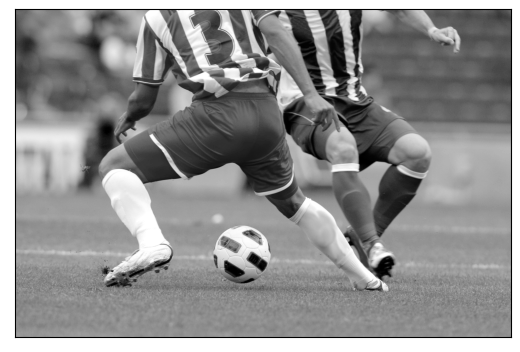

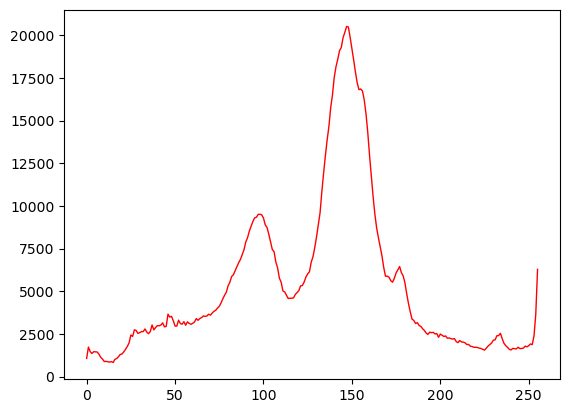

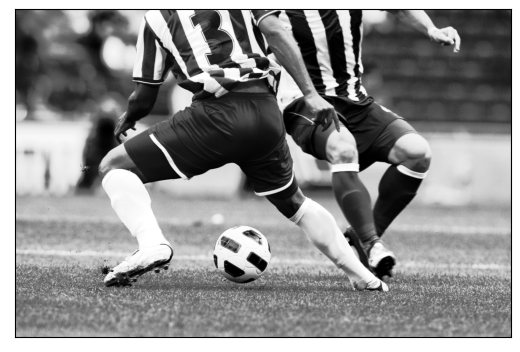

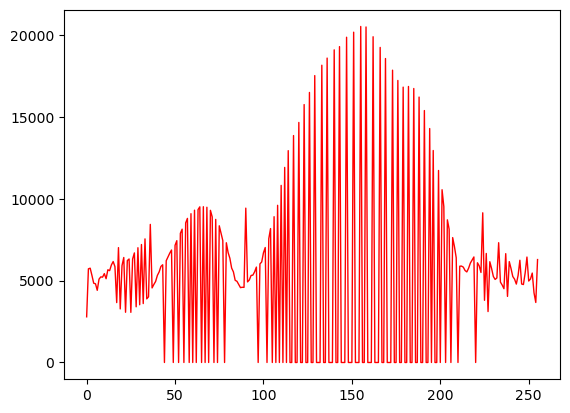

([<matplotlib.lines.Line2D at 0x189bb66d100>], None)

In [7]:
#연습문제8
import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread('soccer2.jpg') 

gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray'), plt.xticks([]), plt.yticks([]), plt.show()

h=cv.calcHist([gray],[0],None,[256],[0,256])
plt.plot(h,color='r',linewidth=1), plt.show()

equal=cv.equalizeHist(gray)
plt.imshow(equal,cmap='gray'), plt.xticks([]), plt.yticks([]), plt.show()

h=cv.calcHist([equal],[0],None,[256],[0,256])
plt.plot(h,color='r',linewidth=1), plt.show()

In [ ]:
#연습문제 9번
import cv2 as cv

img=cv.imread('rose.png')

def draw(event,x,y,flags,param):
    global ix,iy
    
    if event ==cv.EVENT_LBUTTONDOWN:
        ix,iy=x,y
    elif event ==cv.EVENT_LBUTTONUP:
        cv.rectangle(img,(ix,iy),(x,y),(0,0,255),2)

patch1=cv.resize(draw,dsize=(0,0),fx=5,fy=5,interpolation=cv.INTER_NEAREST)
patch2=cv.resize(draw,dsize=(0,0),fx=5,fy=5,interpolation=cv.INTER_LINEAR)
patch3=cv.resize(draw,dsize=(0,0),fx=5,fy=5,interpolation=cv.INTER_CUBIC)

cv.imshow('Original',img)
cv.imshow('Resize nearest',patch1) 
cv.imshow('Resize bilinear',patch2) 
cv.imshow('Resize bicubic',patch3) 

cv.waitKey()
cv.destroyAllWindows()